In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from urllib.request import urlopen
from json import loads
from functools import reduce

valid_years = ["2012", "2013", "2014", "2015", "2016"]

In [10]:
'''
Unforunately, API does not have years past 2016.
Following loads district level financial data w/ "leaid": 
Local education agency identification number (NCES) as a common identifier.
'''

#TODO: error handling, make modular, and maybe just download files as csv and open

dfs = []

for year in valid_years: 
    url = "https://educationdata.urban.org/api/v1/school-districts/ccd/finance/{}/".format(year)
    print("Fetching data from", url)
    response = urlopen(url)

    data = loads(response.read())
    dfs.append(pd.DataFrame.from_dict(data["results"]))
    
finance_df = pd.concat(dfs, sort=True)

# # Test on first item in dataframe
# finance_df.loc[finance_df["leaid"]=="0100002"]
finance_df.head()

Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2013/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2014/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2015/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2016/


,assets_bond_fund,assets_other,assets_sinking_fund,benefits_employee_instruction,benefits_employee_total,benefits_enterprise_operations,benefits_food_service,benefits_supp_bco,benefits_supp_general_admin,benefits_supp_instruc_staff,...,salaries_supp_operation_plant,salaries_supp_pupils,salaries_supp_sch_admin,salaries_supp_stud_transport,salaries_teachers_other_ed,salaries_teachers_regular_prog,salaries_teachers_sped,salaries_teachers_vocational,salaries_total,year
0,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2012
1,1069000,3455000,930000,4696000,7651000,0,475000,112000.0,174000,182000,...,941000,1285000,1524000,713000,355000,9816000,751000,781000,20503000,2012
2,3004000,6224000,1162000,6375000,11074000,0,781000,113000.0,307000,336000,...,1327000,1964000,2494000,1497000,521000,12736000,1749000,1026000,29562000,2012
3,4365000,82284000,26266000,19137000,30929000,0,1605000,319000.0,155000,1292000,...,4258000,4843000,6492000,3594000,1306000,45073000,3370000,1333000,85331000,2012
4,32515000,17892000,8730000,10515000,16767000,0,832000,333000.0,157000,1078000,...,2021000,2393000,3178000,1501000,815000,22564000,2857000,1324000,46318000,2012


In [11]:
'''
Unforunately, API does not have years past 2016.
Following loads district level student poverty data w/ "leaid": 
Local education agency identification number (NCES) as a common identifier.
'''

dfs = []

for year in valid_years: 
    url = "https://educationdata.urban.org/api/v1/school-districts/saipe/{}/".format(year)
    print("Fetching data from", url)
    response = urlopen(url)

    data = loads(response.read())
    dfs.append(pd.DataFrame.from_dict(data["results"]))
    
poverty_df = pd.concat(dfs, sort=True)
# # Test on first item in dataframe : DNE
# poverty_df.loc[poverty_df["leaid"]=="0100002"]
poverty_df.head()

Fetching data from https://educationdata.urban.org/api/v1/school-districts/saipe/2012/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/saipe/2013/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/saipe/2014/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/saipe/2015/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/saipe/2016/


,district_id,district_name,est_population_5_17,est_population_5_17_pct,est_population_5_17_poverty,est_population_5_17_poverty_pct,est_population_total,fips,leaid,year
0,00005,Albertville City School District,4057.0,0.188461,1803.0,0.444417,21527.0,1,0100005,2012
1,00030,Alexander City City School District,2793.0,0.161660,1125.0,0.402793,17277.0,1,0100030,2012
2,00060,Andalusia City School District,1536.0,0.169536,576.0,0.375000,9060.0,1,0100060,2012
3,00090,Anniston City School District,3363.0,0.147132,1337.0,0.397562,22857.0,1,0100090,2012
4,00100,Arab City School District,1497.0,0.182516,269.0,0.179693,8202.0,1,0100100,2012


In [12]:
'''
Unforunately, API does not have years past 2016.
And states: ['AL' 'AK' 'AZ' 'IL' 'CA' 'MI' 'MD' 'MN' 'TX' 'AR' 'NV']
Following loads geographic data w/ "leaid": 
Local education agency identification number (NCES) as a common identifier.
'''

dfs = []

for year in valid_years: 
    url = "https://educationdata.urban.org/api/v1/school-districts/ccd/directory/{}/".format(year)
    print("Fetching data from", url)
    response = urlopen(url)

    data = loads(response.read())
    dfs.append(pd.DataFrame.from_dict(data["results"]))
    
geographic_df = pd.concat(dfs, sort=True)

# # Test on first item in dataframe 
# geographic_df.loc[geographic_df["leaid"]=="0100002"]
print(geographic_df["state_mailing"].unique())
geographic_df.head()

Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/directory/2012/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/directory/2013/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/directory/2014/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/directory/2015/
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/directory/2016/
['AL' 'AK' 'AZ' 'IL' 'CA' 'MI' 'MD' 'MN' 'TX' 'AR' 'NV']


,agency_charter_indicator,agency_level,agency_type,boundary_change_indicator,bureau_indian_education,cbsa,cbsa_type,city_location,city_mailing,cmsa,...,teachers_prek_fte,teachers_secondary_fte,teachers_total_fte,teachers_ungraded_fte,urban_centric_locale,year,zip4_location,zip4_mailing,zip_location,zip_mailing
0,3,None,1,1,0,33860,1,MT. MEIGS,MT MEIGS,None,...,0.0,0.0,0.0,-2.0,21,2012,0066,0066,36057,36057
1,3,None,1,1,0,10700,2,ALBERTVILLE,ALBERTVILLE,None,...,4.0,99.0,273.0,-2.0,32,2012,0025,0025,35950,35950
2,3,None,1,1,0,10700,2,GUNTERSVILLE,GUNTERSVILLE,None,...,5.0,182.0,444.0,-2.0,42,2012,9351,9351,35976,35976
3,3,None,1,1,0,13820,1,HOOVER,HOOVER,None,...,6.0,486.0,1052.0,-2.0,13,2012,5500,5500,35243,35243
4,3,None,1,1,0,26620,1,MADISON,MADISON,None,...,6.0,264.0,557.0,-2.0,21,2012,1615,1615,35758,35758


In [13]:
df = pd.merge(finance_df, geographic_df, on=["leaid"])
df.head()

,assets_bond_fund,assets_other,assets_sinking_fund,benefits_employee_instruction,benefits_employee_total,benefits_enterprise_operations,benefits_food_service,benefits_supp_bco,benefits_supp_general_admin,benefits_supp_instruc_staff,...,teachers_prek_fte,teachers_secondary_fte,teachers_total_fte,teachers_ungraded_fte,urban_centric_locale,year_y,zip4_location,zip4_mailing,zip_location,zip_mailing
0,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,0.0,0.0,0.0,-2.0,21,2012,0066,0066,36057,36057
1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,0.0,0.0,0.0,-2.0,21,2013,0066,0066,36057,36057
2,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1.0,-1.0,-1.0,-2.0,41,2014,0066,,36057,36057
3,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1.0,-1.0,-1.0,-2.0,41,2015,-1,,36057,36057
4,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,NaN,NaN,0.0,NaN,41,2016,,,36057,36057


  State  Year  Total Revenue
0    AK  2012   1.303157e+10
1    AK  2013   1.303157e+10
2    AK  2014   1.303157e+10
3    AK  2015   1.303157e+10
4    AK  2016   1.303157e+10


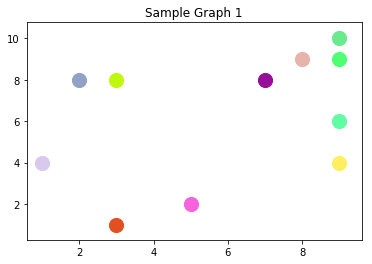

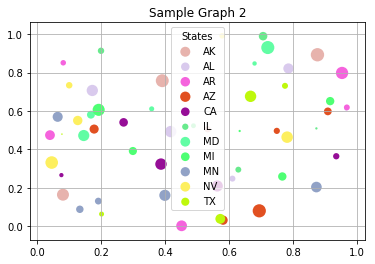

In [14]:
'''
Calculate total revenue 'rev_total' (fed, state, local) for all states.
'''
df.rename(columns={'state_mailing':'State'}, inplace = True)
df.rename(columns={'year_y':'Year'}, inplace = True)
grouped_series = df.groupby(['State', 'Year'])['rev_total'].sum().reset_index(name='Total Revenue')

# num_years = len(grouped_series['Year'].unique())
states = grouped_series['State'].unique()
years = grouped_series['Year'].unique()

print(grouped_series.head())

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(grouped_series['State'].unique()))]

'''
Generate sample graphs using colors and random ints
'''

# Sample Graph 1
for i in range(len(states)):
    plt.scatter(random.randint(0, 10), random.randint(0,10), c=colors[i], s=200)

plt.title('Sample Graph 1')
plt.show()
    
# Sample Graph 2  
fig, ax = plt.subplots()
for i in range(len(states)):
    x, y = np.random.rand(2, len(years))
#     print(x,":", y)
    scale = 200.0 * np.random.rand(len(years))
    ax.scatter(x, y, c=colors[i], s=scale, label=states[i],
               alpha=1, edgecolors='none')

ax.legend(title='States')
ax.grid(True)

plt.title('Sample Graph 2')
plt.show()

Missing some data for state:  CA  . Skipping...
Missing some data for state:  MI  . Skipping...
Missing some data for state:  NV  . Skipping...


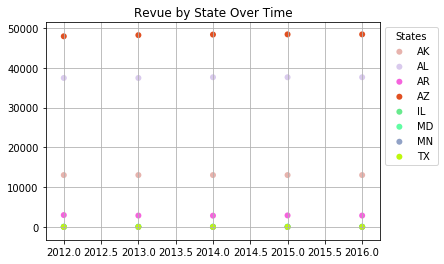

In [22]:
'''
Plot the total revenue 'rev_total' (fed, state, local) for all states by year
'''
#TODO: Add label on side (in billions); connect the dots 
fig, ax = plt.subplots()
for i in range(len(states)):
    curr_state = states[i]
    curr_total_revenues = grouped_series.loc[grouped_series['State']== curr_state]['Total Revenue']/1000000
    
    if(len(curr_total_revenues) != len(years)):
        print("Missing some data for state: ", states[i], " . Skipping...")
    else:
        x , y =  years, curr_total_revenues
        ax.scatter(x, y, c=colors[i], label=curr_state, alpha=1, edgecolors='none')

ax.legend(title='States', bbox_to_anchor=(1.0, 1.0))
ax.grid(True)

plt.title('Revue by State Over Time')
plt.show()

Missing some data for state:  CA  . Skipping...
Missing some data for state:  MI  . Skipping...
Missing some data for state:  NV  . Skipping...


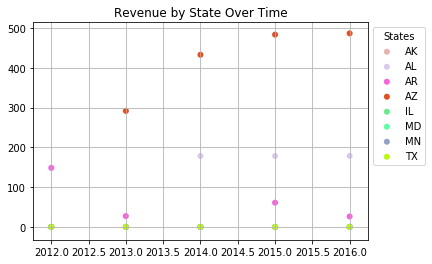

In [23]:
'''
Plot the total revenue 'rev_total' (fed, state, local) for all states by year starting at origin
'''
#TODO: Add label on side (in millions -> but normalized, so need to set origin as (0, min_rev)
#TODO: connect the dots 
fig, ax = plt.subplots()

 

for i in range(len(states)):
    curr_state = states[i]
    curr_total_revenues = grouped_series.loc[grouped_series['State']== curr_state]['Total Revenue']
    min = np.min(curr_total_revenues)
    normalizer = lambda t: (t - min)/1000000
    normalized_revenues = np.array([normalizer(x) for x in curr_total_revenues])
    
    if(len(curr_total_revenues) != len(years)):
        print("Missing some data for state: ", states[i], " . Skipping...")
    else:
        x , y =  years, normalized_revenues
        ax.scatter(x, y, c=colors[i], label=curr_state, alpha=1, edgecolors='none')

ax.legend(title='States', bbox_to_anchor=(1.0, 1.0))
ax.grid(True)

plt.title('Revenue by State Over Time')
plt.show()